# PREPARE ENVIRONMENT

In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import re
import os

from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My Drive/Data Domain/Colab Notebooks/BillboardTop100_1993to2014_EDA/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Data Domain/Colab Notebooks/BillboardTop100_1993to2014_EDA


In [ ]:
df = pd.read_excel('BillboardTop100_1993-2014.xlsx')

pd.set_option('display.max_rows', 500)

# CREATE TRANSFORMATIONS
df['ReleaseYear'] = pd.DatetimeIndex(df['Release Date']).year
df['ReleaseMonth'] = pd.DatetimeIndex(df['Release Date']).month
df['ReleaseDOY'] = df['Release Date'].dt.dayofyear

df['Peak Position 2'] = df['Peak Position'].str.extract('(\d+)')
df['Peak Position 2'] = pd.to_numeric(df['Peak Position 2'])

# ALL-YEARS EDA

In [ ]:
# Review Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7594 entries, 0 to 7593
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Release Date                7594 non-null   datetime64[ns]
 1   Song and Artist             7594 non-null   object        
 2   Genre                       7594 non-null   object        
 3   Album                       7594 non-null   object        
 4   Artist                      7594 non-null   object        
 5   Song                        7594 non-null   object        
 6   Gender                      7594 non-null   object        
 7   Artist Nationality          7594 non-null   object        
 8   Peak Position               7594 non-null   object        
 9   Weeks On Billboard Top 100  7594 non-null   int64         
 10  YouTube Views               7594 non-null   int64         
 11  Likes                       7594 non-null   int64       

NOTE:
* No null rows

In [ ]:
# Destributions
df.describe().round(0)

,Weeks On Billboard Top 100,YouTube Views,Likes,Dislikes,Views Per Like,Song Length (sec),ReleaseYear,ReleaseMonth,ReleaseDOY,Peak Position 2
count,7594.0,7.594000e+03,7594.0,7594.0,7594.0,7594.0,7594.0,7594.0,7594.0,7594.0
mean,14.0,2.701297e+07,102117.0,7111.0,279.0,245.0,2006.0,7.0,197.0,47.0
std,10.0,8.323586e+07,309909.0,70347.0,151.0,49.0,6.0,3.0,102.0,30.0
min,1.0,0.000000e+00,0.0,0.0,0.0,62.0,1993.0,1.0,1.0,1.0
25%,5.0,4.181920e+05,1651.0,40.0,189.0,217.0,2002.0,4.0,111.0,20.0
50%,15.0,3.125114e+06,11645.0,292.0,252.0,240.0,2007.0,7.0,209.0,47.0
75%,20.0,1.624023e+07,61962.0,1675.0,334.0,266.0,2010.0,10.0,288.0,73.0
max,87.0,2.374140e+09,9614925.0,4848247.0,3999.0,823.0,2014.0,12.0,366.0,100.0


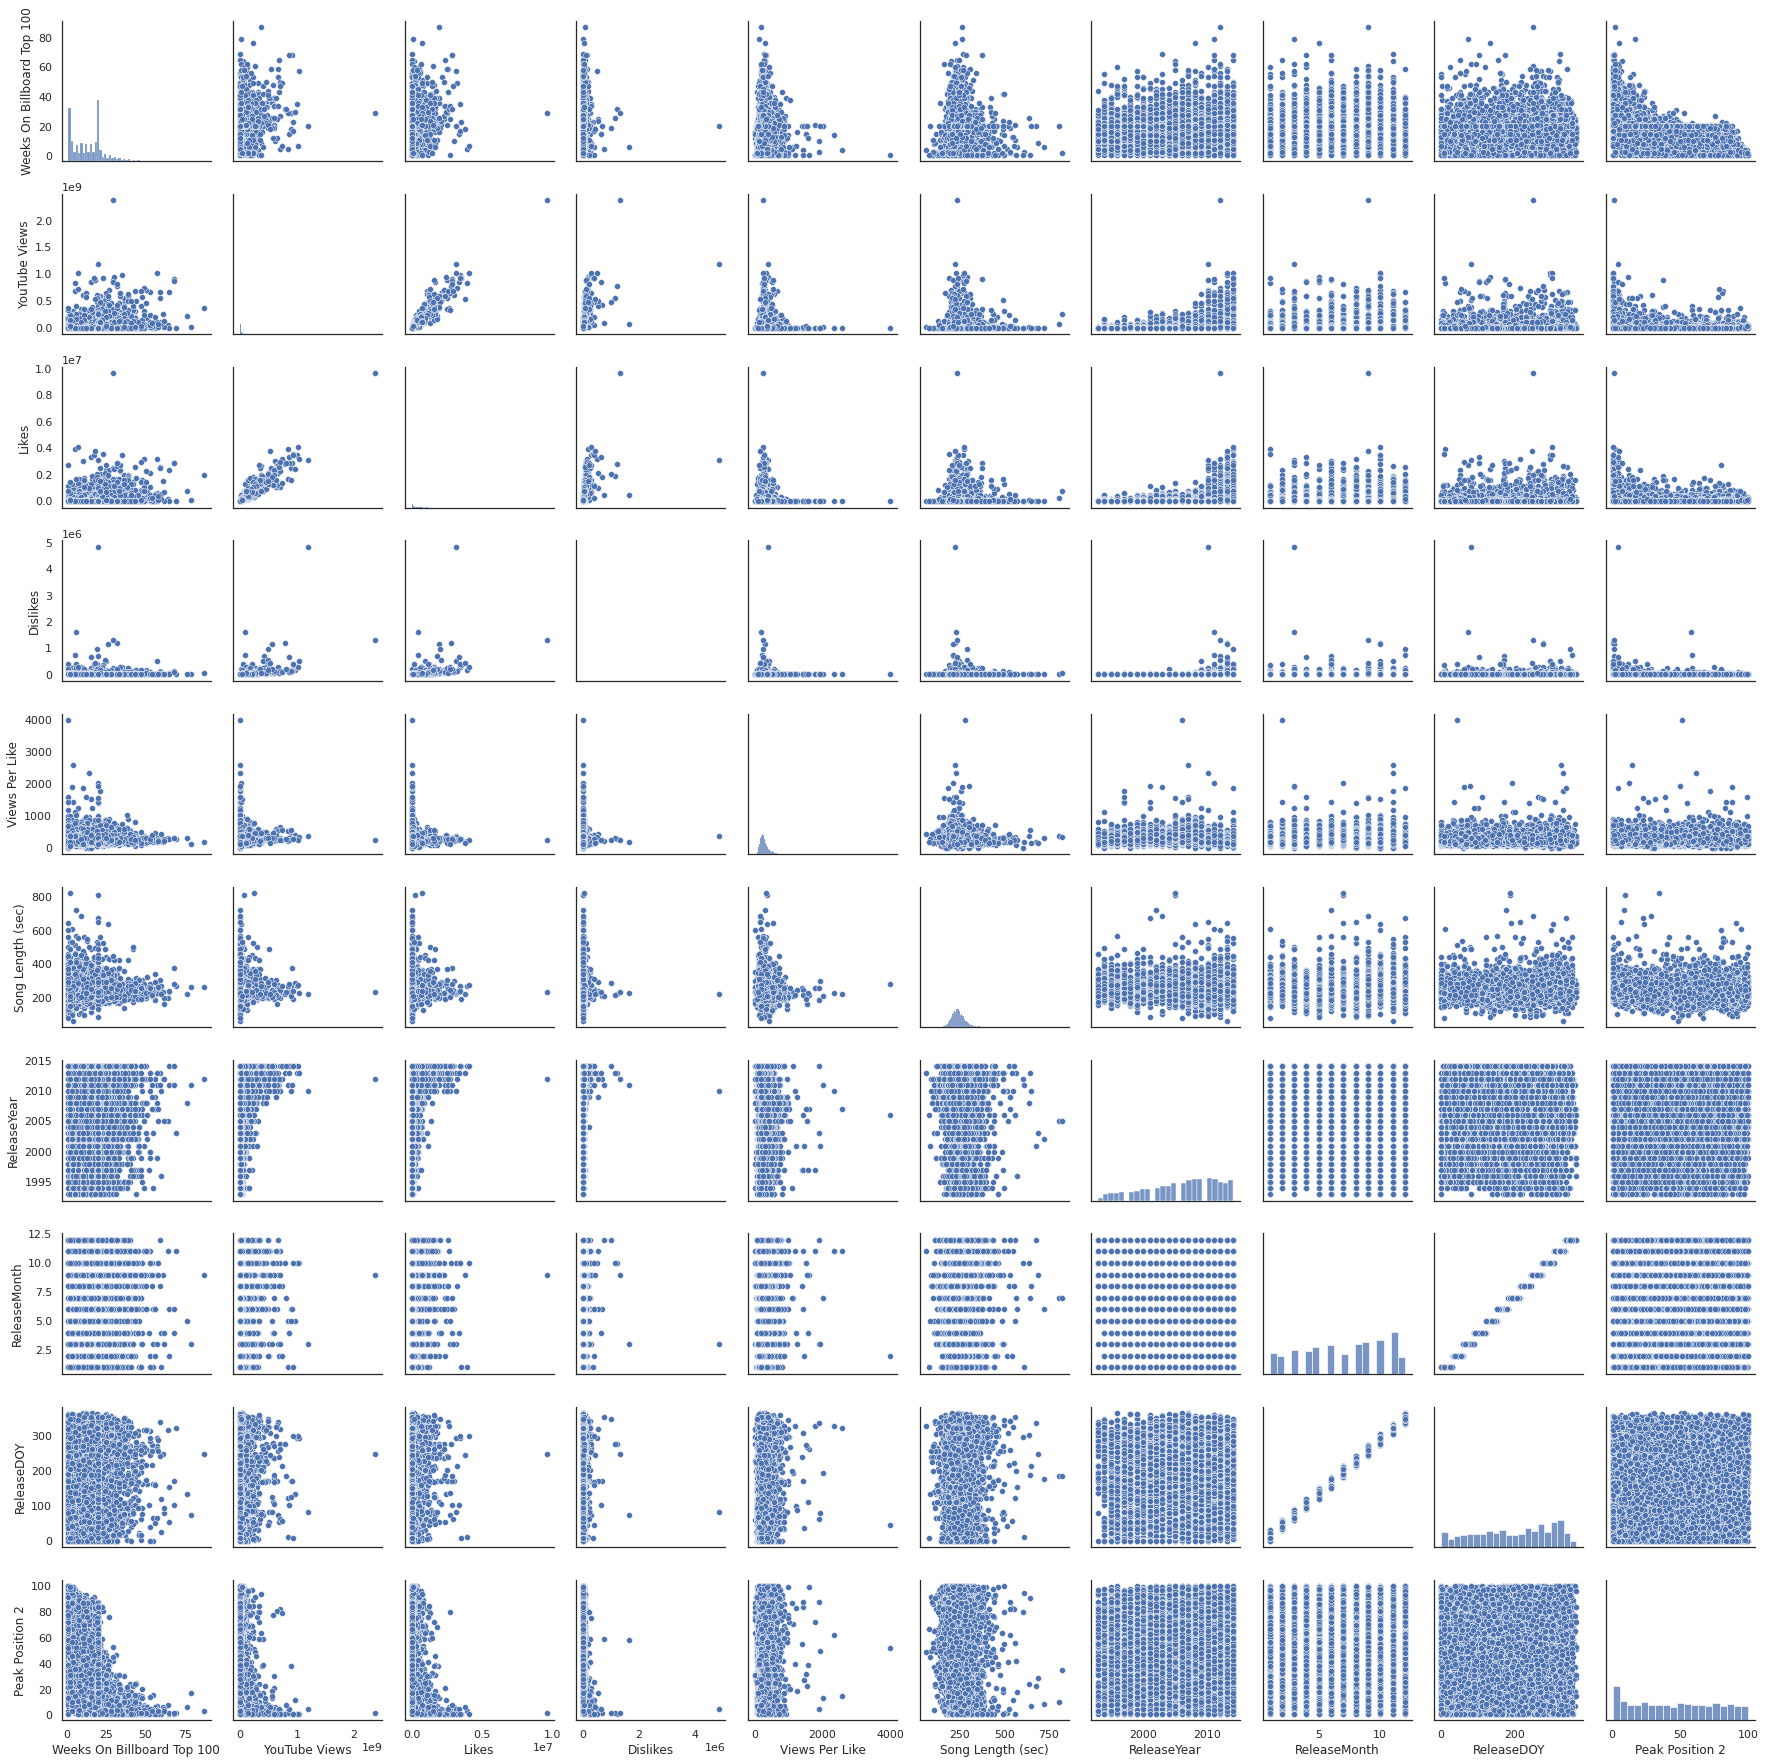

In [ ]:
# Scatter Matrix for Full Data
sns.set_theme(style="white")
sns.pairplot(df)

NOTES:
* No clear relationships observed within the numeric columns except for Youtube Views and Likes
* Distributions mainly right skewed except for release dates, which show to be uniformly distributed through the months and day of year.  ReleaseYear shows increasing trend as time goes.

In [ ]:
# Volumes
columns = ['Genre', 'Album', 'Artist', 'Song', 'Artist Nationality']
for col in columns:
    print('{}: {}'.format(col, df[col].nunique()))

Genre: 69
Album: 4265
Artist: 2533
Song: 6823
Artist Nationality: 50


NOTE:
* Wow, nearly 70 genres of music!

In [ ]:
# Total Albums, Artists, Songs, Nationality Per Genre
df.groupby('Genre')['Album', 'Artist', 'Song', 'Artist Nationality'].nunique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Album,Artist,Song,Artist Nationality
Genre,,,,
Alternative Folk,13,12,22,6
Alternative Rock,356,186,566,8
Alternative Roots,6,6,6,1
Brazilian Traditional,1,1,1,1
Brit Pop,5,4,7,2
Brit Rock,17,7,26,1
Caribbean,6,6,8,2
Caribbean Pop,3,4,4,3
Children's,28,19,47,1


<BarContainer object of 22 artists>

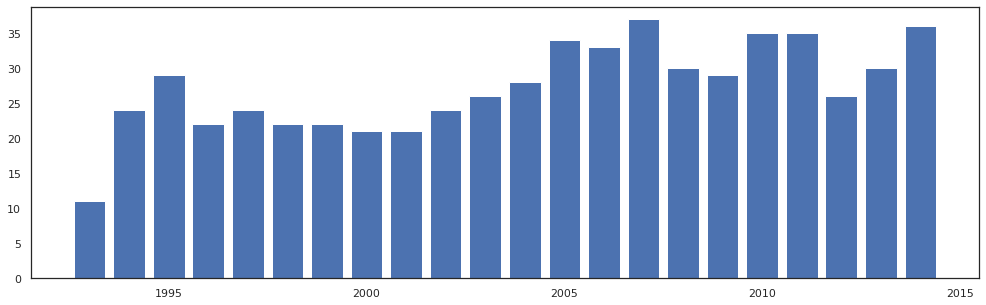

In [ ]:
# Total Volume of Genres Per Year
figure(figsize=(17, 5))
plt.bar(sorted(df.ReleaseYear.unique())
       , df.groupby('ReleaseYear').Genre.nunique())


NOTES:
* Although there are about 70 genres, at most for any given year there are only 35 of them that show up in the Billboard Top 100.
* The distribution is mostly uniform per year, but a slight increase in the number of genres per year can be seen.

# Comparing the Top 10 Genres (by Song Volume)

In [ ]:
# Compare Top 10 Distributions of YouTube Metrics for Most Popular Genres (Most Popular Determined by Song Volume)
cutoff_songvol = min(sorted(df.groupby('Genre').Song.nunique(), reverse=True)[:10])
GenreTop10 = df.groupby('Genre').Song.nunique()[df.groupby('Genre').Song.nunique() >= cutoff_songvol]
GenreTop10 = pd.DataFrame(GenreTop10).sort_values(by='Song', ascending=False)
GenreTop10

,Song
Genre,
Hip-Hop/Rap,1540
Pop,1442
Contemporary R&B/Soul,1251
Country,1046
Alternative Rock,566
Classic Country,250
Metal,129
Dance & Club,90
Indie Rock,82


In [ ]:
# Create DF for Top 10 Genres by Song Volume
df_GenreTop10 = df[df.Genre.isin(GenreTop10.index)]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


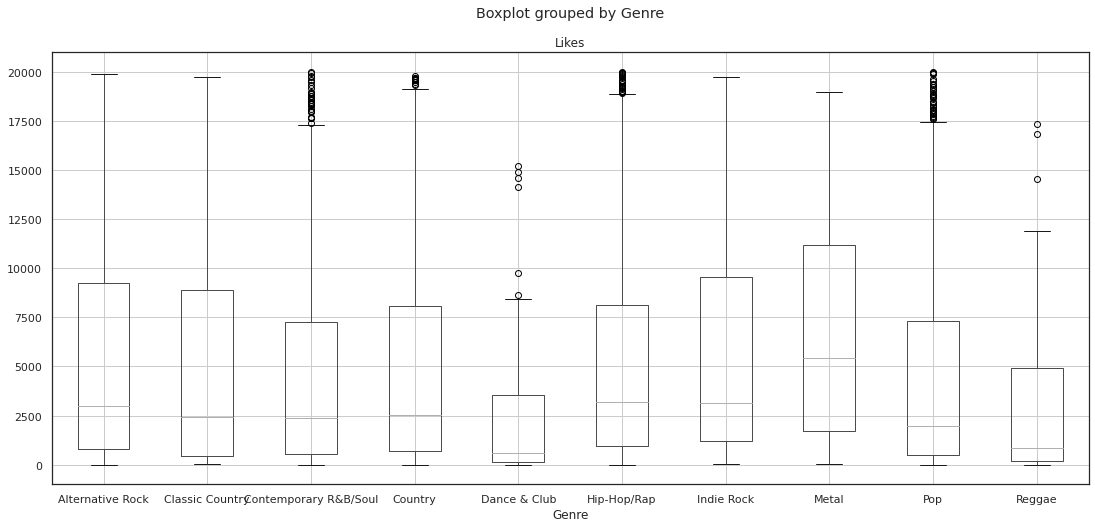

In [ ]:
# Check Distributions of Likes (Cutting-off tails)
df_GenreTop10_1 = df_GenreTop10[df_GenreTop10.Likes < 20000]
df_GenreTop10_1.boxplot(figsize=(18, 8)
                        , by='Genre'
                        , column=['Likes'])

NOTES:
* Likes seem equivalent for the most part
* Dance & Club and Reggae has lowest average likes at around 1000
* Metal has the highest count at a little over 5K on average.  Even though Metal ranks at the bottom half of the top 10 genres by song volume, they look to have a loyal fan-base.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


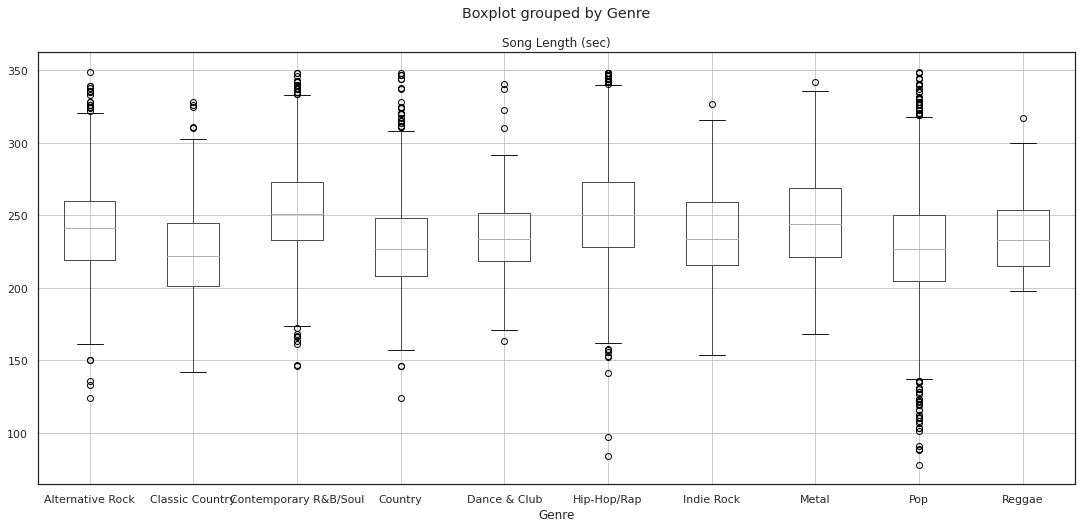

In [ ]:
# Check Distributions of Song Length (Cutting-off tails)
df_GenreTop10_2 = df_GenreTop10[df_GenreTop10['Song Length (sec)'] < 350]
df_GenreTop10_2.boxplot(figsize=(18, 8)
                        , by='Genre'
                        , column=['Song Length (sec)'])

NOTE:
* Song lengths are pretty standard across the the top 10 genres by song volume

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


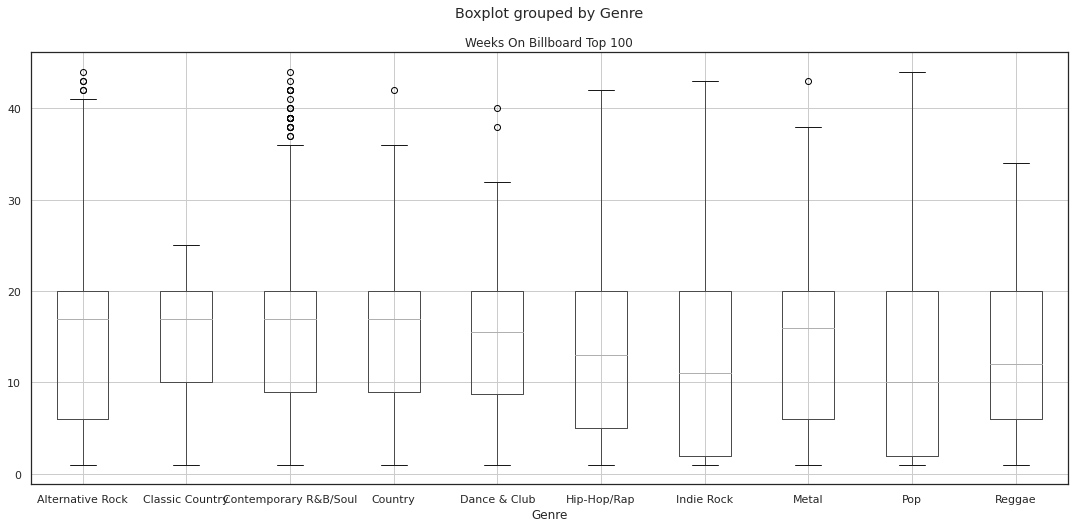

In [ ]:
# Check Distributions of Weeks On Billboard Top 100 (Cutting-off tails)
df_GenreTop10_3 = df_GenreTop10[df_GenreTop10['Weeks On Billboard Top 100'] < 45]
df_GenreTop10_3.boxplot(figsize=(18, 8)
                        , by='Genre'
                        , column=['Weeks On Billboard Top 100'])

NOTES:
* Although distribution of weeks on Billboard Top 100 if fairly similar, we see that the genres typically average around 18 weeks.
* Hip-Hop/Rap, Indie Rock, Pop, and Reggae on the other hand average around 11 weeks.  Hip-Hop/Rap and Pop produce the most song volumes but have weaker sustainability on the Billboards top 100.

# Trends for Top 10 Genres (by Song Volume)

In [ ]:
# Plot Count Trend Function
def plot_CountTrend(metric, df):
    figure(figsize=(12, 7))
    for genre in df.Genre.unique():
        plt.plot(df[df.Genre==genre].groupby(['ReleaseYear'])[metric].nunique()
                , label=genre)
        plt.legend(loc='best')
    plt.show()


# Plot Totals Trend Function
def plot_SumTrend(metric, df):
    figure(figsize=(12, 7))
    for genre in df.Genre.unique():
        plt.plot(df[[metric, 'ReleaseYear']][df.Genre==genre].groupby(['ReleaseYear']).sum()
                , label=genre)
        plt.legend(loc='best')
    plt.show()
    

# Plot Average Trend Function
def plot_AvgTrend(metric, df):
    figure(figsize=(12, 7))
    for genre in df.Genre.unique():
        plt.plot(df[[metric, 'ReleaseYear']][df.Genre==genre].groupby(['ReleaseYear']).mean()
                , label=genre)
        plt.legend(loc='best')
    plt.show()

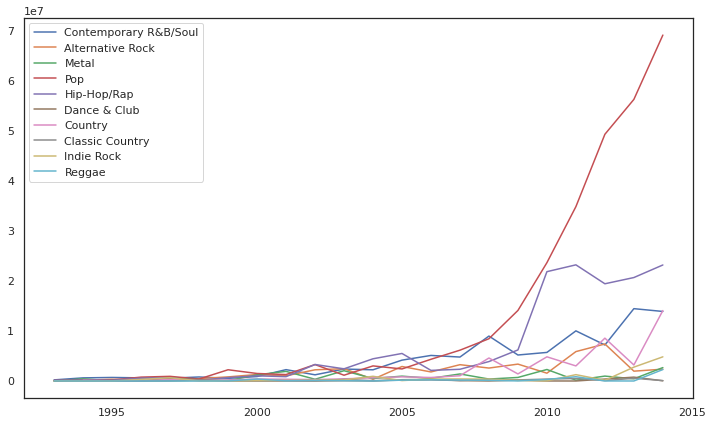

In [ ]:
# Likes Trend (Keeping in mind YouTube popularity starts around 2008)
plot_SumTrend(metric='Likes', df=df_GenreTop10)

NOTE:
* Pop really took off when YouTube launched in 2005!

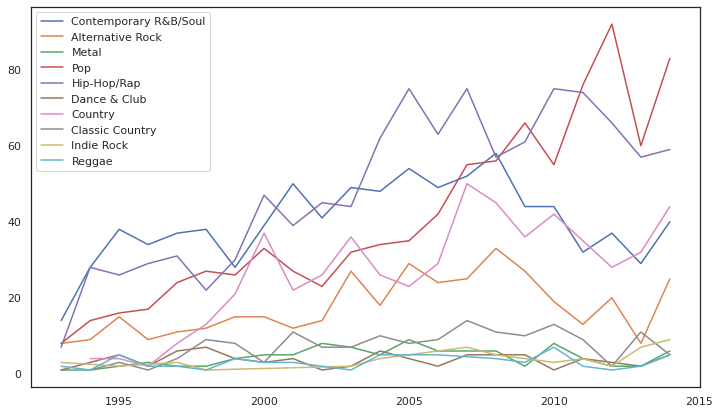

In [ ]:
# Album Volume Trends
plot_CountTrend(metric='Album', df=df_GenreTop10)

NOTES
* Hip-Hop/Rap and Pop followed similar trend upwards
* Contemporary R&B/Soul followed until around 2008 where it suddenly declined significantly up to 2013

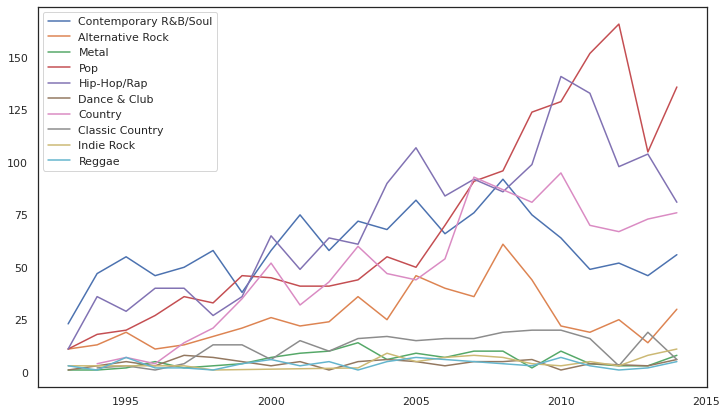

In [ ]:
# Song Volume Trends
metric = 'Song'
plot_CountTrend(metric=metric, df=df_GenreTop10)

NOTE:
* Similar trend can be seen in song volumes as with album volumes.

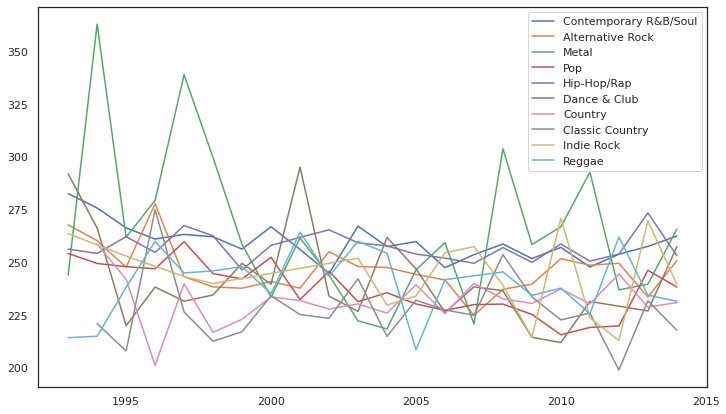

In [ ]:
# Song Length (sec) Trends
metric = 'Song Length (sec)'
plot_AvgTrend(metric=metric, df=df_GenreTop10)

NOTE:
* Metal songs used to average with much more longer playback lengths but has lessened as the years continued.  It made resurgence of this phenomenon around 2009-2011.

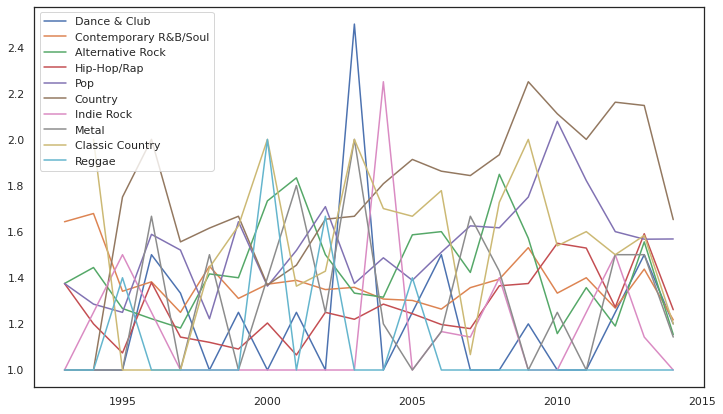

In [ ]:
# Average Number of Songs Per Album Trends
df_SongsPerAlbum = df_GenreTop10[['Album', 'Artist', 'Genre', 'ReleaseYear', 'Song']]
df_SongsPerAlbum = pd.DataFrame(df_SongsPerAlbum.groupby(['Album', 'Artist', 'Genre', 'ReleaseYear']).Song.nunique())
df_SongsPerAlbum = df_SongsPerAlbum.reset_index(level=['Artist', 'Genre', 'Album', 'ReleaseYear'])
df_SongsPerAlbum = df_SongsPerAlbum.rename(columns={'Song':'TotalSongs'})

metric = 'TotalSongs'
plot_AvgTrend(metric=metric, df=df_SongsPerAlbum)

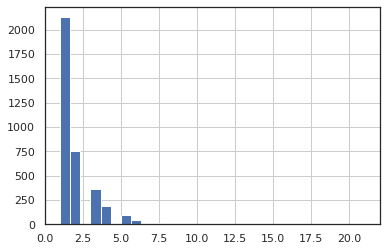

In [ ]:
# Validate Low Number of Average Songs Per Album
df_GenreTop10.groupby('Album').Song.nunique().hist(bins=30)

NOTE:
* Tons of singles gets released!

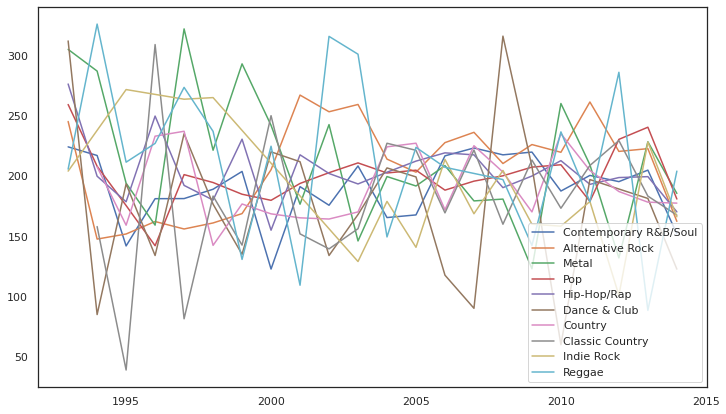

In [ ]:
# Review Release Day-of-Year (DOY) Patterns For Top 10 Genres by Song Volume
metric = 'ReleaseDOY'
plot_AvgTrend(metric=metric, df=df_GenreTop10)

NOTE:
* Most of the Top 10 Genres by Song Volume average out to releasing songs around the 200th day of the calendar year.  This is mid-July.  However, some variability can be observed for genres like Classic Country, Reggae, and Metal

Text(0, 0.5, 'Song Volume')

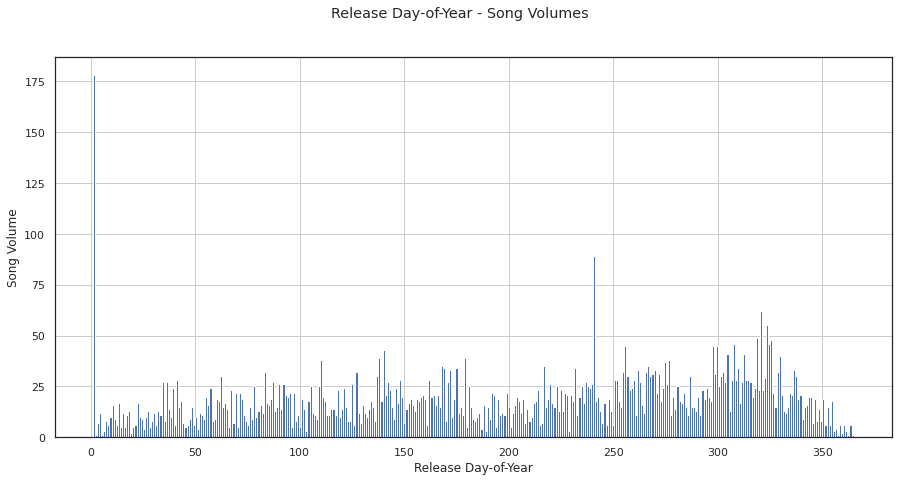

In [ ]:
# When do songs release in calendar year
df_GenreTop10.ReleaseDOY.hist(bins=365, figsize=(15,7))
plt.suptitle('Release Day-of-Year - Song Volumes')
plt.xlabel('Release Day-of-Year')
plt.ylabel('Song Volume')

NOTE:
* Jan 1 is day of year that has most song releases
* This is identical to full data but with higher scale
* Next most released day is 241st day of the year

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


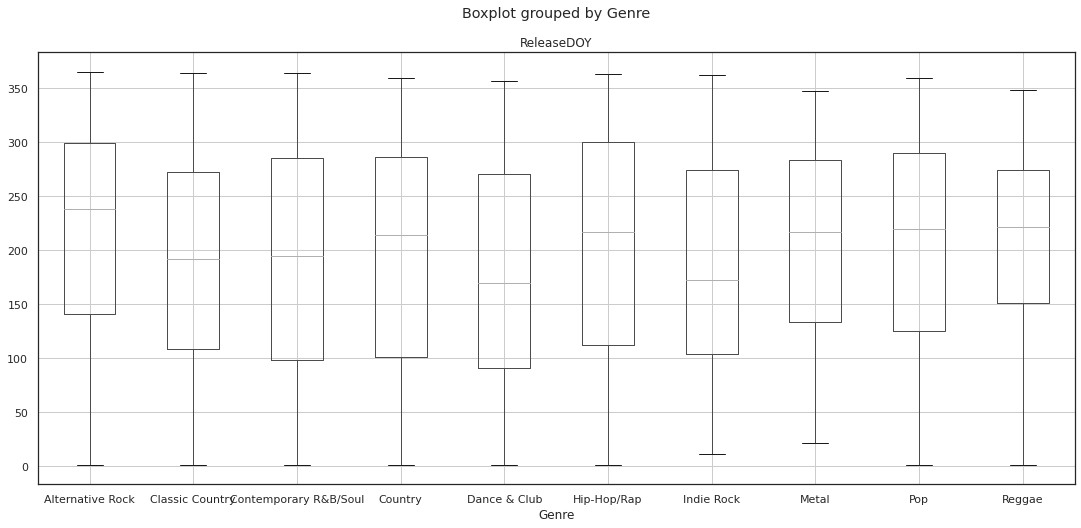

In [ ]:
# Check Distributions of Release Day-of-Year (DOY)
df_GenreTop10.boxplot(figsize=(18, 8)
                        , by='Genre'
                        , column=['ReleaseDOY'])

NOTE:
* Athough Jan 1 is a the highest song volume release DOY, days following have some of the lowest song volumes.
* Most songs release around the 200th day-of-year.

In [ ]:
# CORRELATIONS
# Correlations Function
def my_corrmat(df_input):
    sns.set_theme(style="white")

    # Compute the correlation matrix
    corrmat = df_input.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corrmat, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corrmat, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

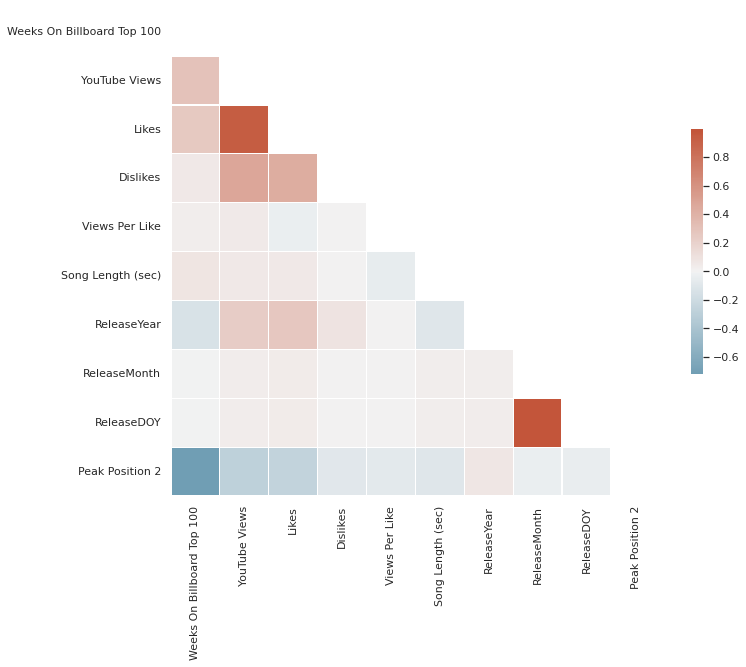

In [ ]:
# Correlations for Top 10 Genres by Song Volume
my_corrmat(df_GenreTop10)

NOTE: Correlation patterns identical for full data

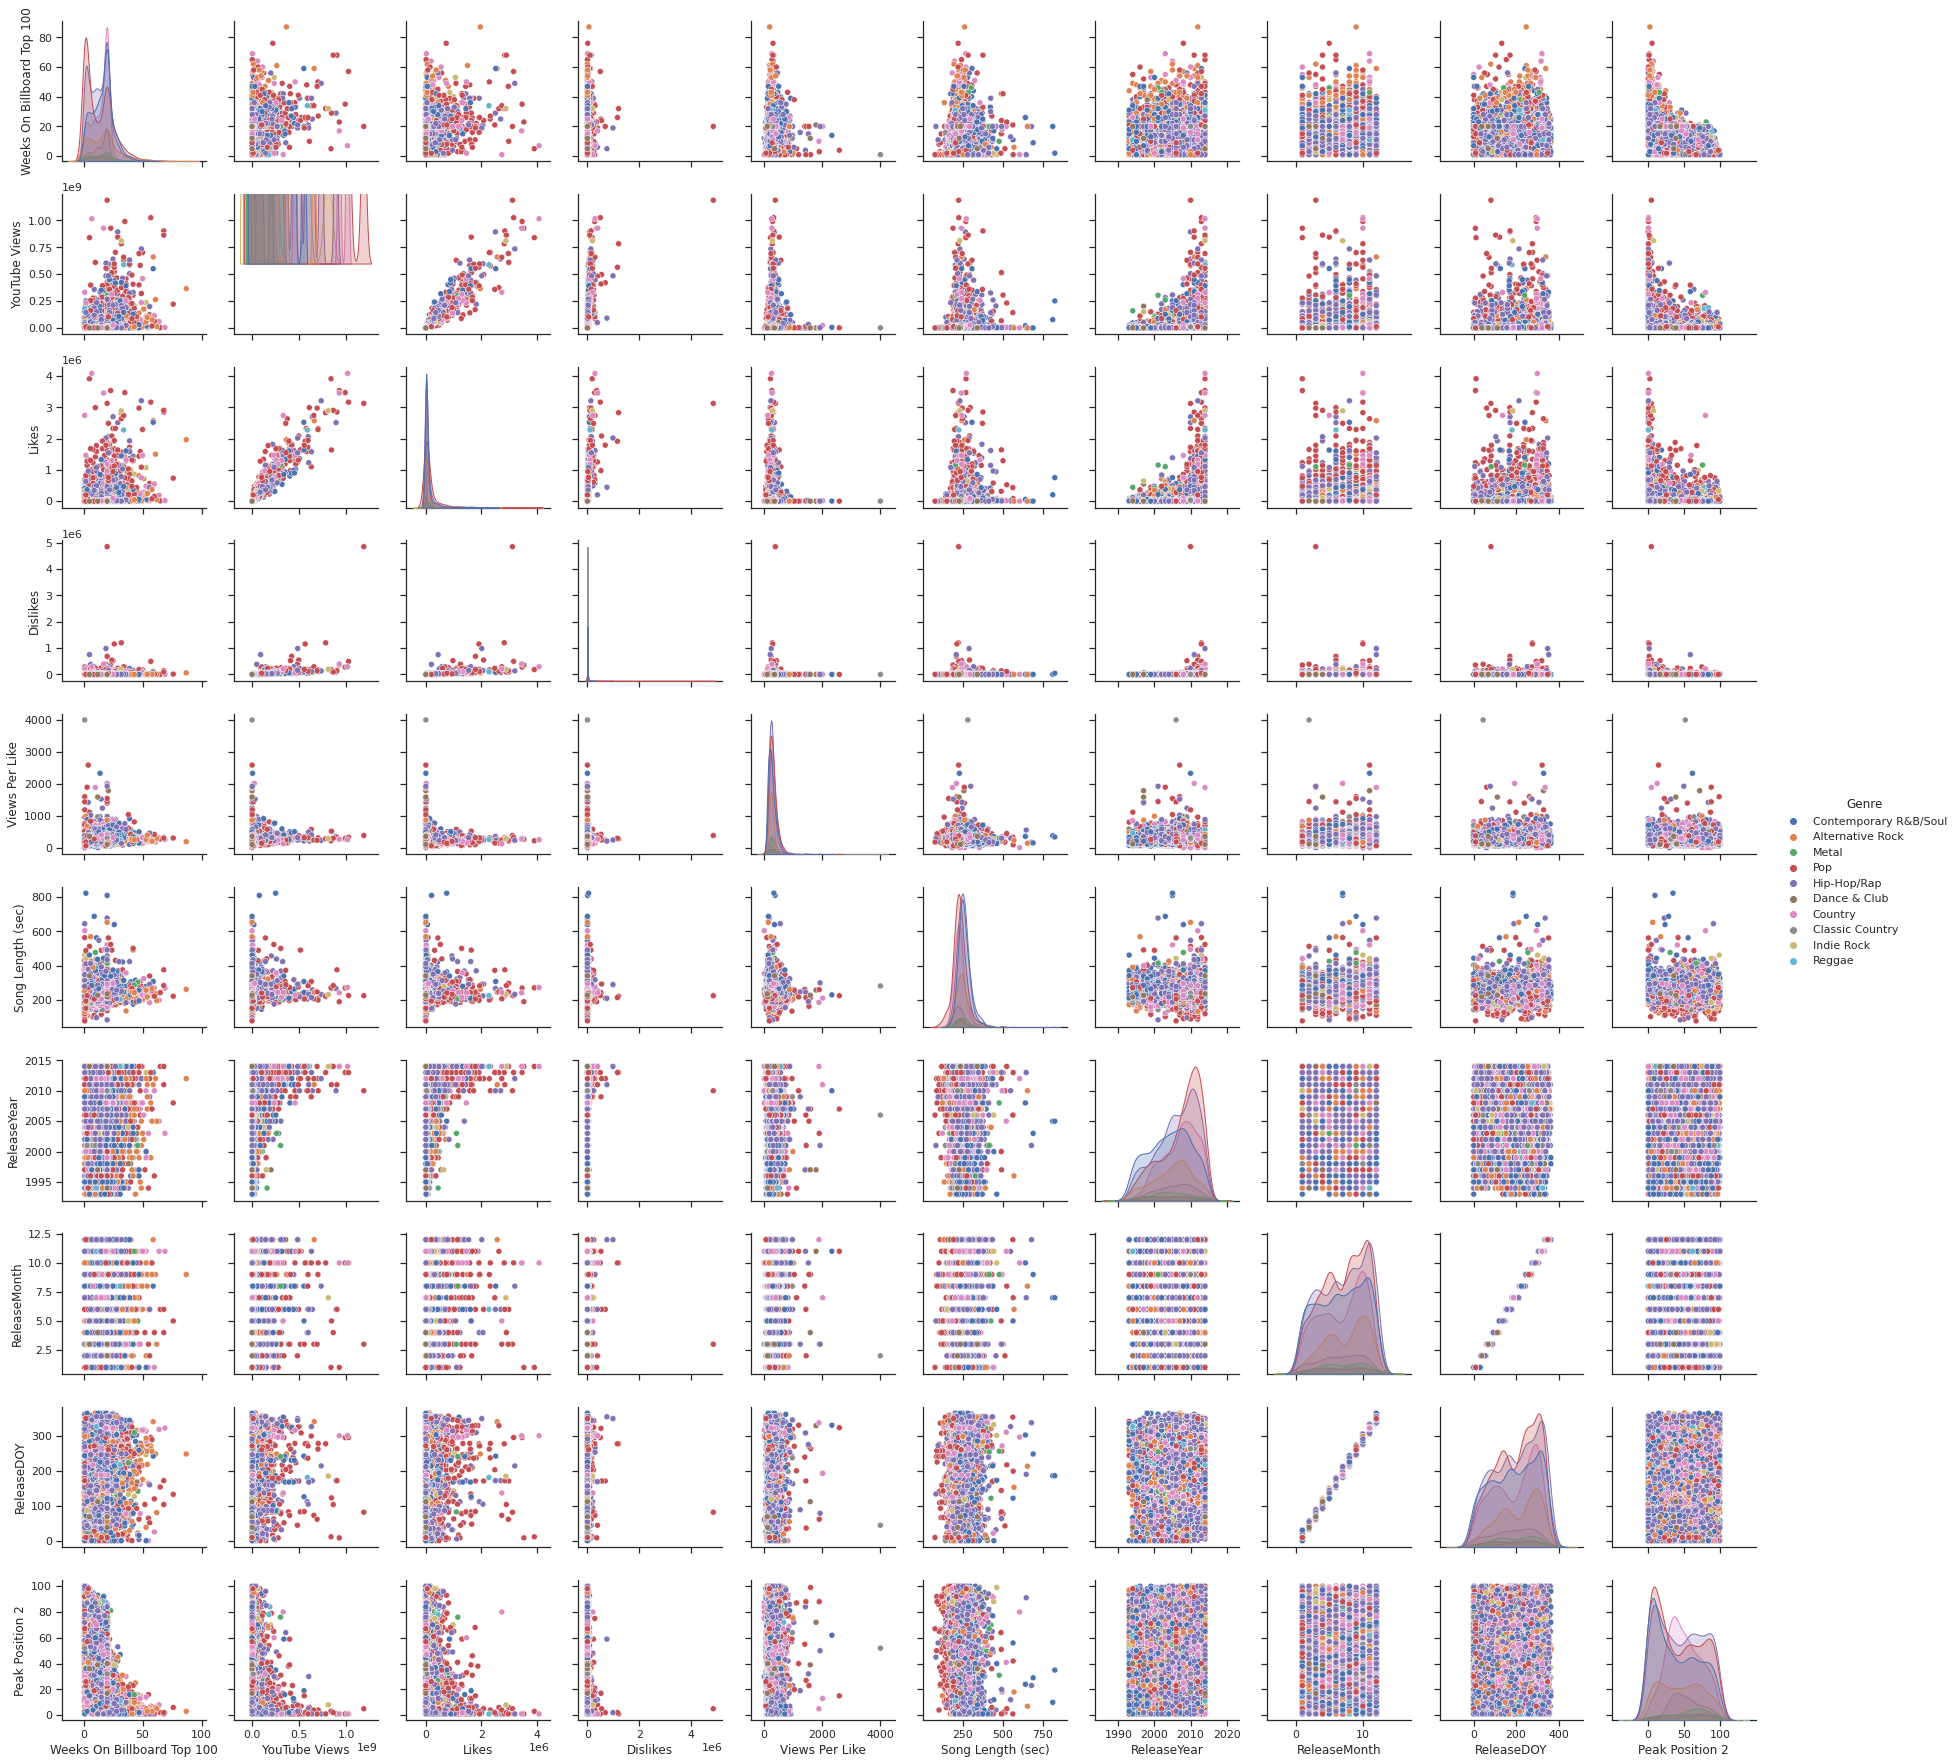

In [ ]:
# Scatter Matrix for Top 10 Genres by Song Volume
sns.set_theme(style="ticks")
sns.pairplot(df_GenreTop10, hue="Genre")

NOTES:
* Genres form no natural clusters within the dimensional spaces and reveal that they share similar YouTube and release date characteristics.
* High skews can be observed for numeric data points.